## Adjust infilled LGM SST/SIC files for use as CAM boundary condition.

#### Author: Vince Cooper, referencing scripts from Yue Dong and Cecile Hannay

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import pandas as pd
import cmocean as cmo

In [13]:
## I only changed the loading to holo_sst to be the ensemble version, because it is the only
## dataset that is loaded in its default config as received from U Arizona.
## Load SST
ddir = '/home/disk/atmos/vcooper/work/p2c2/lgm/'
# dfile = 'lgmDA_hol_SST_monthly_climo_v2.1.nc'
dfile = 'lgmDA_hol_SST_monthly_ens.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf).set_coords(['lat','lon','month','ens'])
holo_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_sst_climo['mask'] = xr.where(~np.isnan(holo_sst_climo.sst.isel(nmonth=0,nEns=0)), 1, 0)

# dfile = 'lgmDA_lgm_SST_monthly_climo.nc'
# ncf = ddir + dfile
# tempds = xr.open_dataset(ncf).set_coords(['lat','lon','month','ens'])
# lgm_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
# lgm_sst_climo['mask'] = xr.where(~np.isnan(lgm_sst_climo.sst.isel(nmonth=0,nEns=0)), 1, 0)

# ## Load ICEFRAC
# # dfile = 'lgmDA_hol_ICEFRAC_monthly_climo.nc'
# dfile = 'lgmDA_hol_ATM_monthly_climo_v2.1.nc'
# ncf = ddir + dfile
# tempds = xr.open_dataset(ncf).set_coords(['lat','lon','month','ens'])
# holo_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
# holo_ice_climo['mask'] = xr.where(~np.isnan(holo_ice_climo.icefrac.isel(nmonth=0,nEns=0)), 1, 0)

# dfile = 'lgmDA_lgm_ICEFRAC_monthly_climo.nc'
# ncf = ddir + dfile
# tempds = xr.open_dataset(ncf).set_coords(['lat','lon','month','ens'])
# lgm_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
# lgm_ice_climo['mask'] = xr.where(~np.isnan(lgm_ice_climo.icefrac.isel(nmonth=0,nEns=0)), 1, 0)


dfile = 'lgmDA_lgm_SST_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).sst,
                   tempds.set_coords(['lat','lon','month']).sst_std])
lgm_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_sst_climo['mask'] = xr.where(~np.isnan(lgm_sst_climo.sst.isel(nmonth=0)), 1, 0)

## Load ICEFRAC
dfile = 'lgmDA_hol_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
holo_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_ice_climo['mask'] = xr.where(~np.isnan(holo_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

dfile = 'lgmDA_lgm_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
lgm_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_ice_climo['mask'] = xr.where(~np.isnan(lgm_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

In [3]:
# ## load infilled version
# path = '/home/disk/sipn/vcooper/nobackup/lgm/infilled/'
# lgm_sst_merged = xr.open_dataset(path + 
#                                      'lgmDA_lgm_SST_monthly_climo_merged.nc')

# lgm_ice_merged = xr.open_dataset(path + 'lgmDA_lgm_ICEFRAC_monthly_climo_merged_v3.nc').set_coords(['lat','lon'])


# ## load modern day AMIP SSTs and SIC
# ## currently using the 1.9x2.5 version since that matches resolution of received icefrac data
# path = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
# amip2000 = xr.open_dataset(path + 'sst_HadOIBl_bc_1.9x2.5_clim_c061031.nc',decode_times=False)
# # amip2000 = xr.open_dataset(path + 'sst_HadOIBl_bc_0.9x1.25_clim_c040926.nc',decode_times=False)

In [30]:
## ENSEMBLE VERSION
## load infilled version
path = '/home/disk/sipn/vcooper/nobackup/lgm/infilled/ens/'
lgm_sst_merged = xr.open_dataset(path + 
                                     'lgmDA_lgm_SST_monthly_allens.nc')
lgm_sst_merged = lgm_sst_merged.assign_coords(ens=('nEns',np.arange(len(lgm_sst_merged.nEns))+1))

lgm_ice_merged = xr.open_dataset(path + 'lgmDA_lgm_ICEFRAC_monthly_allens.nc').set_coords(['lat','lon','ens'])


## load modern day AMIP SSTs and SIC
## currently using the 1.9x2.5 version since that matches resolution of received icefrac data
path = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
amip2000 = xr.open_dataset(path + 'sst_HadOIBl_bc_1.9x2.5_clim_c061031.nc',decode_times=False)
# amip2000 = xr.open_dataset(path + 'sst_HadOIBl_bc_0.9x1.25_clim_c040926.nc',decode_times=False)

## Holocene
## includes antarctic ice sheet adjustments
path = '/home/disk/sipn/vcooper/nobackup/lgm/infilled/ens/'
holo_ice_merged = xr.open_dataset(path + 'lgmDA_hol_ICEFRAC_monthly_allens.nc').set_coords(['lat','lon','ens'])

In [22]:
%%time
## check data
val = lgm_sst_merged.sst.values
print(np.nanmin(val), np.nanmax(val))

val = lgm_ice_merged.icefrac.values
print(np.nanmin(val), np.nanmax(val))

val = holo_sst_climo.sst.values
print(np.nanmin(val), np.nanmax(val))

val = holo_ice_merged.icefrac.values
print(np.nanmin(val), np.nanmax(val))

-7.051304340362549 31.031124114990234
0.0 1.0000000000000089
-6.582683086395264 37.99980926513672
1.9394552956881403e-28 1.0000000000000089
CPU times: user 13.4 s, sys: 29.5 s, total: 42.9 s
Wall time: 1min 29s


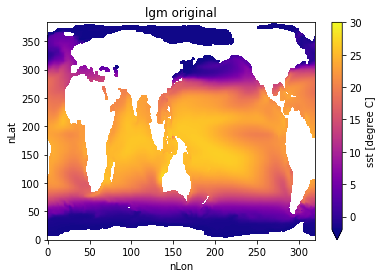

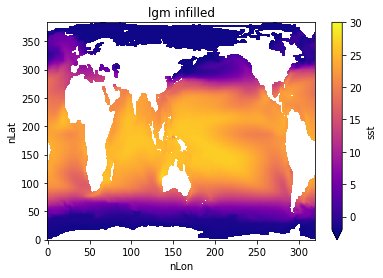

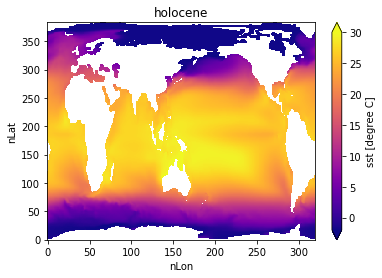

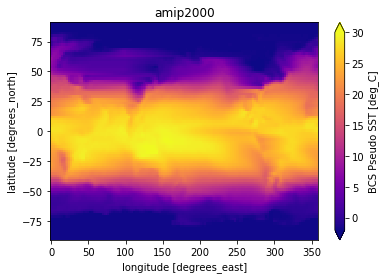

In [6]:
## quick look at various grids
lgm_sst_climo.sst[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('lgm original')
plt.show()

lgm_sst_merged.sst[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('lgm infilled')
plt.show()

holo_sst_climo.sst[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('holocene')
plt.show()

amip2000.SST_cpl[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('amip2000')
plt.show()

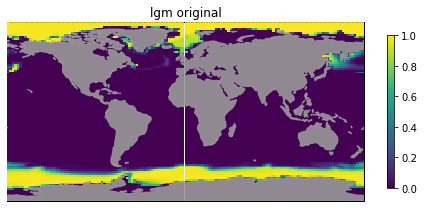

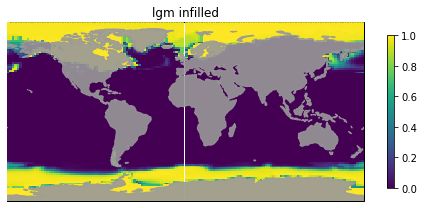

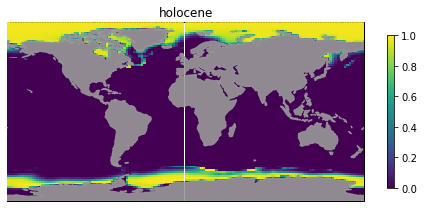

In [7]:
## quick look at various grids
isel_m = 4

plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_ice_climo.lon,lgm_ice_climo.lat,
               lgm_ice_climo.icefrac[isel_m],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.9,color='0.6')
plt.colorbar(shrink=0.7)
plt.title('lgm original')
plt.show()

plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_ice_merged.lon,lgm_ice_merged.lat,
               lgm_ice_merged.icefrac[isel_m],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.9,color='0.6')
plt.colorbar(shrink=0.7)
plt.title('lgm infilled')
plt.show()

plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(holo_ice_climo.lon,holo_ice_climo.lat,
               holo_ice_climo.icefrac[isel_m],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.9,color='0.6')
plt.colorbar(shrink=0.7)
plt.title('holocene')
plt.show()

# amip2000.icecov_cpl[0].plot(cmap='viridis',vmin=0,vmax=1)
# plt.title('amip2000')
# plt.show()

### Regrid LGM onto amip grid with dummy values over land

In [35]:
lgm_sst_merged.sst[0,0]

<xarray.DataArray 'sst' (nLat: 384, nLon: 320)>
[122880 values with dtype=float64]
Coordinates:
    month    int64 1
    ens      int64 1
    lon      (nLat, nLon) float64 ...
    lat      (nLat, nLon) float64 ...
Dimensions without coordinates: nLat, nLon
Attributes:
    regrid_method:  bilinear

In [39]:
%%time
## SST (icefrac is already on 1.9x2.5 grid)
amip2000['mask'] = xr.where(~np.isnan(amip2000.SST_cpl[0]),1,0) ## dummy mask, 1 everywhere
newgrid = amip2000 # desired grid
data_for_regridding = lgm_sst_merged
data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding.sst[0,0]),1,0)

regridder = xe.Regridder(data_for_regridding, newgrid,
                         method='bilinear',
                         periodic=True,extrap_num_src_pnts=12,
                         extrap_method='inverse_dist',
                         filename='bilinear_sst_to_amip.nc',
                         reuse_weights=True)

regridder

CPU times: user 136 ms, sys: 2.88 ms, total: 139 ms
Wall time: 171 ms


/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_sst_to_amip.nc 
Reuse pre-computed weights? True 
Input grid shape:           (384, 320) 
Output grid shape:          (96, 144) 
Periodic in longitude?      True

In [44]:
%%time
lgm_sst_amipgrid = regridder(lgm_sst_merged)
print('done 1')
holo_sst_amipgrid = regridder(holo_sst_climo)
print('done 2')

done 1
done 2
CPU times: user 9.45 s, sys: 39.7 s, total: 49.1 s
Wall time: 1min 2s


In [45]:
## dummy regridding of original LGM data for plotting purposes
## SST (icefrac is already on 1.9x2.5 grid)
data_for_regridding = lgm_sst_climo
data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding.sst[0]),1,0)

regridder = xe.Regridder(data_for_regridding, newgrid,
                         method='bilinear',
                         periodic=True,
#                          extrap_num_src_pnts=64,extrap_method='inverse_dist',
#                          filename='bilinear_lgm_to_holo_per_extrapID64.nc',
                         reuse_weights=False)

lgm_sst_climo_dummy = regridder(lgm_sst_climo)

regridder

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/frontend.py:567: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_384x320_96x144_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (384, 320) 
Output grid shape:          (96, 144) 
Periodic in longitude?      True

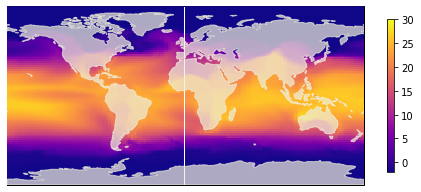

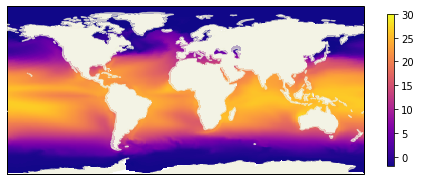

In [10]:
## spot check sst
## infilled, regridded to amip2000 (now has values over land)
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_sst_amipgrid.lon,lgm_sst_amipgrid.lat,
               lgm_sst_amipgrid.sst[0],cmap='plasma',vmin=-2,vmax=30,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.7)
plt.colorbar(shrink=0.7)
plt.show()

## infilled, before regridding
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_sst_merged.lon,lgm_sst_merged.lat,
               lgm_sst_merged.sst[0],cmap='plasma',vmin=-2,vmax=30,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.7)
plt.colorbar(shrink=0.7)
plt.show()

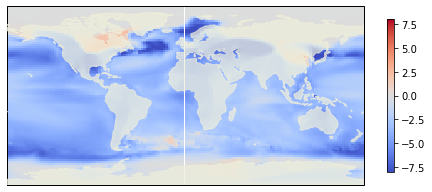

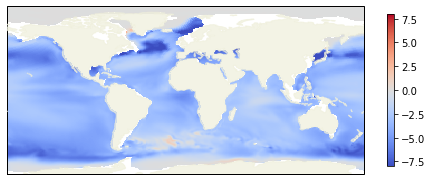

In [11]:
## spot check sst anomaly

## regridded anomaly on AMIP grid
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_sst_amipgrid.lon,lgm_sst_amipgrid.lat,
               lgm_sst_amipgrid.sst[0] - holo_sst_amipgrid.sst[0],cmap='coolwarm',vmin=-8,vmax=8,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.7)
plt.colorbar(shrink=0.7)
plt.show()

## original anomaly from Jess 
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_sst_climo.lon,lgm_sst_climo.lat,
               lgm_sst_climo.sst[0] - holo_sst_climo.sst[0],cmap='coolwarm',vmin=-8,vmax=8,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.7)
plt.colorbar(shrink=0.7)
plt.show()

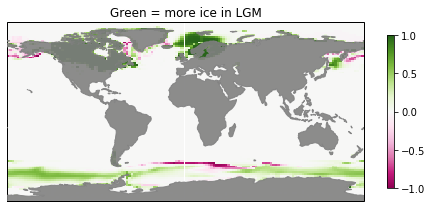

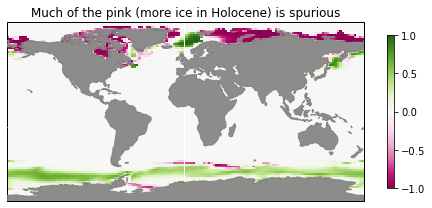

In [12]:
## plots to check icefrac too, although no changes made

## infilled anomaly on AMIP grid
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_ice_merged.lon,lgm_ice_merged.lat,
               lgm_ice_merged.icefrac[0] - holo_ice_merged.icefrac[0],cmap='PiYG',vmin=-1,vmax=1,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.9,color='0.5')
plt.colorbar(shrink=0.7)
plt.title('Green = more ice in LGM')
plt.show()

## original anomaly from U Arizona
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_ice_merged.lon,lgm_ice_merged.lat,
               lgm_ice_climo.icefrac[0] - holo_ice_climo.icefrac[0],cmap='PiYG',vmin=-1,vmax=1,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.9,color='0.5')
plt.title('Much of the pink (more ice in Holocene) is spurious')
plt.colorbar(shrink=0.7)
plt.show()

# Create merged dataset and preprocess

### Following create_SST_files_from_B_case_with_bcgen.ncl

#### ncl code adapted for python

In [55]:
## dummy code to preserve amip dataset attributes etc but use our lgm values
# lgm_sst_bc_prediddle = lgm_sst_amipgrid.sst.values + amip2000.SST_cpl_prediddle - amip2000.SST_cpl_prediddle
# lgm_ice_bc_prediddle = lgm_ice_merged.icefrac.values + amip2000.ice_cov_prediddle - amip2000.ice_cov_prediddle

# holo_sst_bc_prediddle = holo_sst_amipgrid.sst.values + amip2000.SST_cpl_prediddle - amip2000.SST_cpl_prediddle
# holo_ice_bc_prediddle = holo_ice_merged.icefrac.values + amip2000.ice_cov_prediddle - amip2000.ice_cov_prediddle

## ensemble version
lgm_sst_amipgrid = lgm_sst_amipgrid.rename(nmonth = 'time')
holo_sst_amipgrid = holo_sst_amipgrid.rename(nmonth = 'time')
lgm_sst_amipgrid['time'] = amip2000.SST_cpl_prediddle.time
holo_sst_amipgrid['time'] = amip2000.SST_cpl_prediddle.time
lgm_sst_bc_prediddle = lgm_sst_amipgrid.sst
holo_sst_bc_prediddle = holo_sst_amipgrid.sst

lgm_ice_bc_prediddle = xr.DataArray(lgm_ice_merged.icefrac.values, 
                                    dims=lgm_sst_bc_prediddle.dims,
                                    coords=lgm_sst_bc_prediddle.coords)
holo_ice_bc_prediddle = xr.DataArray(holo_ice_merged.icefrac.values, 
                                    dims=holo_sst_bc_prediddle.dims,
                                    coords=holo_sst_bc_prediddle.coords)

ValueError: cannot add coordinates with new dimensions to a DataArray

In [79]:
## This function does (what I call the) Hurrell adjustments
def data_consistency_before_bcgen(sst_prediddle,sic_prediddle):
    
    ## this function has the reference code from ncl script for each step
    
    # 1) If SST < -1.8 or ice frac >= 90%, SST = -1.8
    # SST = where(SST.le.-1.8, -1.8, SST)
    # SST = where(SEAICE.gt.90., -1.8, SST)

    sst_prediddle_adj = xr.where(sst_prediddle < -1.8, 
                                        -1.8, sst_prediddle)
    sst_prediddle_adj = xr.where(sic_prediddle > 0.9, 
                                        -1.8, sst_prediddle_adj)

    # ; 2) min ice frac is 0%, max ice_frac is 100%
    # SEAICE = where(SEAICE.lt.0., 0., SEAICE)
    # SEAICE = where(SEAICE.gt.100., 100., SEAICE)
    sic_prediddle_adj = xr.where(sic_prediddle < 0, 
                                        0, sic_prediddle)
    sic_prediddle_adj = xr.where(sic_prediddle_adj > 1, 
                                        1, sic_prediddle_adj)

    # ; 3) Hurrell et al correction to SST (if 0.15 < ice frac < 0.9)
    # SST_max = 9.328*(0.729-(SEAICE/100.)^3)-1.8
    # SST = where((SEAICE.gt.15.).and.(SEAICE.lt.90.).and.(SST.gt.SST_max), SST_max, SST)
    SST_max = 9.328*(0.729-(sic_prediddle_adj)**3)-1.8
    sst_prediddle_adj = xr.where((sic_prediddle_adj > 0.15) & 
                                        (sic_prediddle_adj < 0.90) &
                                        (sst_prediddle_adj > SST_max), 
                                         SST_max, sst_prediddle_adj)

    # ; 4) No sea ice if SST > 4.97
    # SEAICE = where(SST.gt.4.97, 0., SEAICE)
    sic_prediddle_adj = xr.where(sst_prediddle_adj > 4.97, 
                                        0, sic_prediddle_adj)

    # ; 5) Hurrell et al correction to ice frac (if -1.8 < SST < 4.97)
    # ice_max = 100.*(0.729-(SST+1.8)/9.328)^(1./3.)
    # SEAICE = where((SST.gt.-1.8).and.(SST.lt.4.97).and.(SEAICE.gt.ice_max), ice_max, SEAICE)
    ice_max = (0.729-(sst_prediddle_adj+1.8)/9.328)**(1./3.)
    sic_prediddle_adj = xr.where((sst_prediddle_adj > -1.8) &  ## VTC switched to >=
                                        (sst_prediddle_adj < 4.97) & 
                                        (sic_prediddle_adj > ice_max), 
                                         ice_max, sic_prediddle_adj)

    # print((/"Filling in missing values in SST and SEAICE..."/))
    # poisson_grid_fill(SST, True, 1, 500, 0.01, 0.6, 0)
    # poisson_grid_fill(SEAICE, True, 1, 500, 0.01, 0.6, 0)
    ##  VTC: don't need this step because already extrapolated by regridding
    ##       but should check whether these land values are actually used?
    ##       appears they are not bc of land model.
    
    return(sst_prediddle_adj, sic_prediddle_adj)

0.9


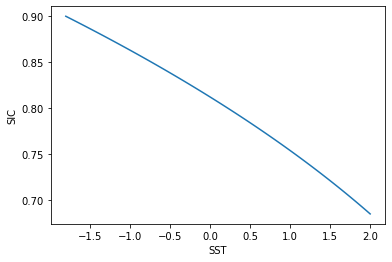

In [15]:
## check hurrell change
xsst = np.linspace(-1.8,2,100)
plt.plot(xsst, (0.729-(xsst+1.8)/9.328)**(1./3.))
plt.ylabel('SIC')
plt.xlabel('SST')
print((0.729-(0)/9.328)**(1./3.))
plt.show()

In [80]:
%%time
## adjust values for lgm and holocene
lgm_sst_bc_prediddle_adj, lgm_ice_bc_prediddle_adj = data_consistency_before_bcgen(lgm_sst_bc_prediddle,
                                                                                   lgm_ice_bc_prediddle)

holo_sst_bc_prediddle_adj, holo_ice_bc_prediddle_adj = data_consistency_before_bcgen(holo_sst_bc_prediddle,
                                                                                     holo_ice_bc_prediddle)

CPU times: user 44.9 s, sys: 1min 18s, total: 2min 3s
Wall time: 2min 3s


In [81]:
%%time
## additional dataset of Holo SST + LGM SIC
holofrank_sst_bc_prediddle_adj, holofrank_ice_bc_prediddle_adj = data_consistency_before_bcgen(holo_sst_bc_prediddle,
                                                                                     lgm_ice_bc_prediddle)

CPU times: user 20.2 s, sys: 10.5 s, total: 30.6 s
Wall time: 30.7 s


## Next step is to use the bcgen script for time diddling

## But for now, we will skip it and just get the file ready
BCgen still needs to be done using ncl on cheyenne with this file

In [82]:
## use the pre-made CAM SST/SIC file, and just replace the values with our LGM values
## currently using the 1.9x2.5 version since that matches resolution of received icefrac data
path = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
amip2000 = xr.open_dataset(path + 'sst_HadOIBl_bc_1.9x2.5_clim_c061031.nc',decode_times=False)

## amip2000 is what we mimic
amip2000

<xarray.Dataset>
Dimensions:            (time: 12, lon: 144, lat: 96)
Coordinates:
  * lon                (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat                (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * time               (time) float64 15.5 45.0 74.5 105.0 ... 288.5 319.0 349.5
Data variables:
    date               (time) int32 ...
    datesec            (time) int32 ...
    ice_cov            (time, lat, lon) float32 ...
    ice_cov_prediddle  (time, lat, lon) float32 ...
    SST_cpl            (time, lat, lon) float32 ...
    SST_cpl_prediddle  (time, lat, lon) float32 ...
Attributes:
    history:  2006-10-31 10:40:13 regrid -i ../../data/MODEL.ICE.HAD187001-19...

In [121]:
## in this prediddled version, the prediddle arrays will be equal to the ice_cov and SST_cpl arrays 
lgm_bc_final_prediddle = amip2000.copy() 
# holo_bc_final_prediddle = amip2000.copy()
# holofrank_bc_final_prediddle = amip2000.copy()

In [122]:
## prep the dataset, using lgm_bc_final_prediddle as dummy
dummyones = np.ones(np.append([1000],list(lgm_bc_final_prediddle.ice_cov.shape)))

tempice = lgm_bc_final_prediddle.ice_cov_prediddle.expand_dims('nEns') * dummyones
tempsst = lgm_bc_final_prediddle.SST_cpl_prediddle.expand_dims('nEns') * dummyones
lgmens = xr.merge([tempsst, tempice])
lgmens['date'] = lgm_bc_final_prediddle.date
lgmens['datesec'] = lgm_bc_final_prediddle.datesec

In [123]:
## replace values with actual lgm ens members
lgmens['ice_cov_prediddle'] = (['nEns','time','lat','lon'],
                                lgm_ice_bc_prediddle_adj.values.astype('float32'))
lgmens['SST_cpl_prediddle'] = (['nEns','time','lat','lon'],
                                lgm_sst_bc_prediddle_adj.values.astype('float32'))

In [124]:
holoens = copy.deepcopy(lgmens)
## replace values with actual lgm ens members
holoens['ice_cov_prediddle'] = (['nEns','time','lat','lon'],
                                holo_ice_bc_prediddle_adj.values.astype('float32'))
holoens['SST_cpl_prediddle'] = (['nEns','time','lat','lon'],
                                holo_sst_bc_prediddle_adj.values.astype('float32'))

In [125]:
holofrankens = copy.deepcopy(lgmens)
## replace values with actual lgm ens members
holofrankens['ice_cov_prediddle'] = (['nEns','time','lat','lon'],
                                holofrank_ice_bc_prediddle_adj.values.astype('float32'))
holofrankens['SST_cpl_prediddle'] = (['nEns','time','lat','lon'],
                                holofrank_sst_bc_prediddle_adj.values.astype('float32'))

In [20]:
# lgm_bc_final_prediddle['ice_cov'] = lgm_ice_bc_prediddle_adj.astype('float32')
# lgm_bc_final_prediddle['ice_cov_prediddle'] = lgm_bc_final_prediddle.ice_cov

# lgm_bc_final_prediddle['SST_cpl'] = lgm_sst_bc_prediddle_adj.astype('float32')
# lgm_bc_final_prediddle['SST_cpl_prediddle'] = lgm_bc_final_prediddle.SST_cpl

In [21]:
# holo_bc_final_prediddle['ice_cov'] = holo_ice_bc_prediddle_adj.astype('float32')
# holo_bc_final_prediddle['ice_cov_prediddle'] = holo_bc_final_prediddle.ice_cov

# holo_bc_final_prediddle['SST_cpl'] = holo_sst_bc_prediddle_adj.astype('float32')
# holo_bc_final_prediddle['SST_cpl_prediddle'] = holo_bc_final_prediddle.SST_cpl

In [22]:
# holofrank_bc_final_prediddle['ice_cov'] = holofrank_ice_bc_prediddle_adj.astype('float32')
# holofrank_bc_final_prediddle['ice_cov_prediddle'] = holofrank_bc_final_prediddle.ice_cov

# holofrank_bc_final_prediddle['SST_cpl'] = holofrank_sst_bc_prediddle_adj.astype('float32')
# holofrank_bc_final_prediddle['SST_cpl_prediddle'] = holofrank_bc_final_prediddle.SST_cpl

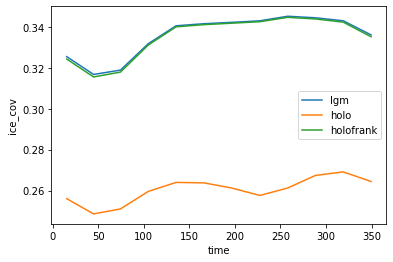

<xarray.DataArray 'ice_cov' (time: 12)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 105.0 ... 258.0 288.5 319.0 349.5
<xarray.DataArray 'ice_cov' (time: 12)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 105.0 ... 258.0 288.5 319.0 349.5
<xarray.DataArray 'ice_cov' (time: 12)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 105.0 ... 258.0 288.5 319.0 349.5
<xarray.DataArray 'ice_cov' (time: 12)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 105.0 ... 258.0 288.5 319.0 349.5


In [23]:
## quick check no grid weighting
lgm_bc_final_prediddle.ice_cov.mean(dim=('lat','lon')).plot(label='lgm')
holo_bc_final_prediddle.ice_cov.mean(dim=('lat','lon')).plot(label='holo')
holofrank_bc_final_prediddle.ice_cov.mean(dim=('lat','lon')).plot(label='holofrank')
plt.legend()
plt.show()

print(lgm_bc_final_prediddle.ice_cov.max(dim=('lat','lon')))
print(lgm_bc_final_prediddle.ice_cov.min(dim=('lat','lon')))

print(holo_bc_final_prediddle.ice_cov.max(dim=('lat','lon')))
print(holo_bc_final_prediddle.ice_cov.min(dim=('lat','lon')))

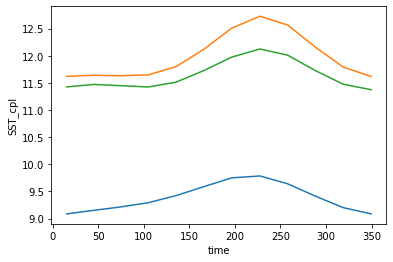

<xarray.DataArray 'SST_cpl' (time: 12)>
array([27.314154, 27.264605, 27.502071, 27.61579 , 27.788998, 28.038578,
       29.626896, 29.944466, 28.678154, 27.563766, 27.357542, 26.965052],
      dtype=float32)
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 105.0 ... 258.0 288.5 319.0 349.5
<xarray.DataArray 'SST_cpl' (time: 12)>
array([-1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8,
       -1.8], dtype=float32)
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 105.0 ... 258.0 288.5 319.0 349.5
<xarray.DataArray 'SST_cpl' (time: 12)>
array([30.252369, 30.259045, 30.363634, 30.739635, 30.908909, 31.390251,
       33.571556, 34.209713, 33.099586, 30.688011, 29.962889, 30.387669],
      dtype=float32)
Coordinates:
  * time     (time) float64 15.5 45.0 74.5 105.0 ... 258.0 288.5 319.0 349.5
<xarray.DataArray 'SST_cpl' (time: 12)>
array([-1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8,
       -1.8], dtype=float32)
Coordinates:
  * time     (tim

In [24]:
lgm_bc_final_prediddle.SST_cpl.mean(dim=('lat','lon')).plot(label='lgm')
holo_bc_final_prediddle.SST_cpl.mean(dim=('lat','lon')).plot(label='holo')
holofrank_bc_final_prediddle.SST_cpl.mean(dim=('lat','lon')).plot(label='holofrank')
plt.show()

print(lgm_bc_final_prediddle.SST_cpl.max(dim=('lat','lon')))
print(lgm_bc_final_prediddle.SST_cpl.min(dim=('lat','lon')))

print(holo_bc_final_prediddle.SST_cpl.max(dim=('lat','lon')))
print(holo_bc_final_prediddle.SST_cpl.min(dim=('lat','lon')))

## Save prediddled files

- to be ready for bcgen, a climatology needs to have an artificial dummy year before and after
- and it should only have "SST" and "ICEFRAC"
- I don't do this here-- i do it on Cheyenne after I send the file to:
- /glade/work/vcooper/p2c2/vtc_camsst/sstice_files


In [137]:
# savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
# fname = 'lgm_bc_final_prediddle_v2.nc'
# lgm_bc_final_prediddle.to_netcdf(savepath + fname)
# print('finished saving')

In [138]:
# savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
# fname = 'holo_bc_final_prediddle_v2.nc'
# holo_bc_final_prediddle.to_netcdf(savepath + fname)
# print('finished saving')

In [139]:
# savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
# fname = 'holofrank_bc_final_prediddle_v2.nc'
# holofrank_bc_final_prediddle.to_netcdf(savepath + fname)
# print('finished saving')

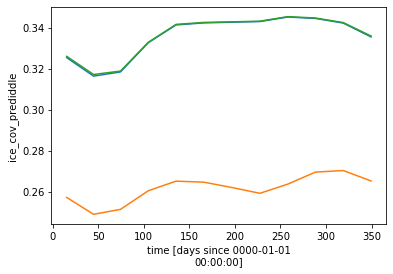

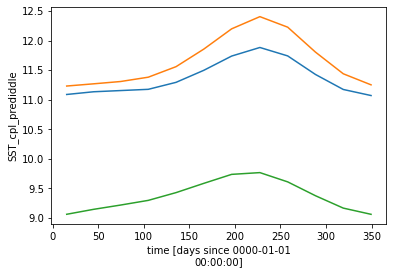

In [135]:
## quick check
holofrankens.ice_cov_prediddle[300].mean(dim=('lat','lon')).plot()
holoens.ice_cov_prediddle[300].mean(dim=('lat','lon')).plot()
lgmens.ice_cov_prediddle[300].mean(dim=('lat','lon')).plot()
plt.show()

holofrankens.SST_cpl_prediddle[300].mean(dim=('lat','lon')).plot()
holoens.SST_cpl_prediddle[300].mean(dim=('lat','lon')).plot()
lgmens.SST_cpl_prediddle[300].mean(dim=('lat','lon')).plot()

In [136]:
### ENSEMBLE VERSION

savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
fname = 'lgm_bc_final_prediddle_ens.nc'
lgmens.to_netcdf(savepath + fname)
print('finished saving')

savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
fname = 'holo_bc_final_prediddle_ens.nc'
holoens.to_netcdf(savepath + fname)
print('finished saving')

savepath = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
fname = 'holofrank_bc_final_prediddle_ens.nc'
holofrankens.to_netcdf(savepath + fname)
print('finished saving')

finished saving
finished saving
finished saving
